In [1]:
pip install tensorflow


  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.32.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp313-cp313-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensor

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
%pip install matplotlib
import matplotlib.pyplot as plt


  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- --

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# 2. Load Dataset (MNIST)
# ====================================
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
x_train = x_train.reshape(x_train.shape[0], 784).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype("float32") / 255

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [10]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (60000, 784) (60000, 10)
Testing data shape: (10000, 784) (10000, 10)


In [11]:
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),  
    layers.Dense(64, activation="relu"),                       
    layers.Dense(10, activation="softmax")                     
])


e:\DL\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9228 - loss: 0.2677 - val_accuracy: 0.9615 - val_loss: 0.1329
Epoch 2/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9671 - loss: 0.1123 - val_accuracy: 0.9657 - val_loss: 0.1148
Epoch 3/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9781 - loss: 0.0750 - val_accuracy: 0.9682 - val_loss: 0.1136
Epoch 4/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9843 - loss: 0.0523 - val_accuracy: 0.9680 - val_loss: 0.1174
Epoch 5/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9640 - val_loss: 0.1368
Epoch 6/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9738 - val_loss: 0.1069
Epoch 7/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9909 - loss: 0.0270 - val_accuracy: 0.9728 - val_loss: 0.1197
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9737 - val_loss: 0.1177
Epoch 9/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9682 - 

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


✅ Test Accuracy: 0.9731


In [16]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

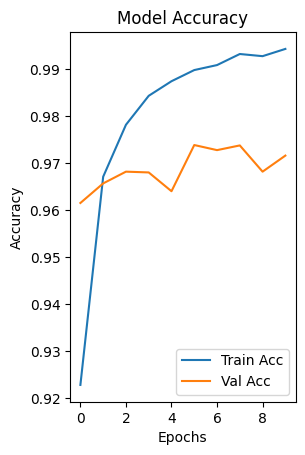

In [17]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

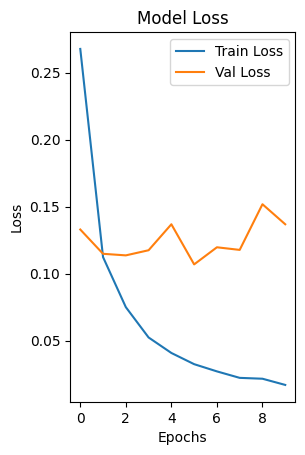

In [18]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [19]:
# 8. Make Predictions
# ====================================
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("\nPredicted labels:", predicted_labels)
print("True labels:", true_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


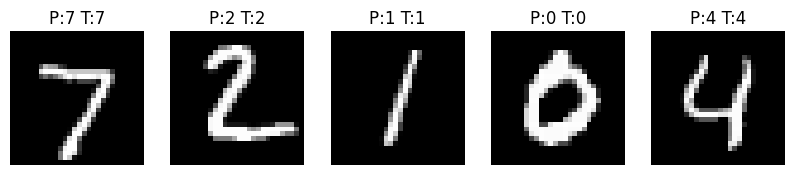

In [20]:
# Show sample images with predictions
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"P:{predicted_labels[i]} T:{true_labels[i]}")
    plt.axis("off")
plt.show()